In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import time
import random 
import gc

C:\Users\edwin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
gc.collect()

7

## Data preprocessing

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/semeion/semeion.data", header = None, sep = " ")

In [4]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,266
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN


In [5]:
#change the dataframe to numpy array
data = df.values 
type(data)

numpy.ndarray

In [6]:
data.shape

(1593, 267)

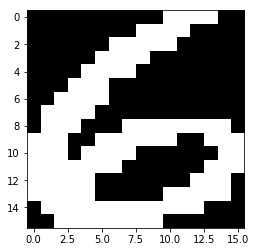

In [7]:
# showing one record on a graph
check = data[123][0:256].reshape(16,16) # reshape to 16 x 16 dimension
plt.imshow(check,cmap="gray")
plt.show()

In [8]:
# assigning the one hot encoding values 
y = data[:,256:266]
y.shape

(1593, 10)

In [9]:
y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
X = data[:,0:256]
X.shape

(1593, 256)

In [11]:
# shuffle the X and y since for keras validation_split, it is not shuffled

ind_list = [i for i in range(len(X))]
random.seed(4)
random.shuffle(ind_list)

X = X[ind_list,:]
y = y[ind_list,:]

## Initializing Convolutional Neural Network (CNN)

In [12]:
# for calculating the model training time
start_time = time.time()

In [13]:
batch_size = 50
num_classes = 10
epochs = 30

# input image dimensions
img_rows, img_cols = 16,16
input_shape = (img_rows, img_cols, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [14]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               295040    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [16]:
# model can only take inputs with input_shape = (16, 16, 1)
X = X.reshape(1593,16,16,1)

In [17]:
# train test split using 40% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1115, 16, 16, 1) (1115, 10)
(478, 16, 16, 1) (478, 10)


In [18]:
# using validation set 40% of the train set
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.3
          )
# validation_data=(X_test, y_test)

Train on 780 samples, validate on 335 samples
Epoch 1/30
780/780 [==============================] - 3s 4ms/step - loss: 1.9518 - acc: 0.3026 - val_loss: 1.3184 - val_acc: 0.6060
Epoch 2/30
780/780 [==============================] - 0s 265us/step - loss: 1.2605 - acc: 0.5962 - val_loss: 0.7045 - val_acc: 0.8209
Epoch 3/30
780/780 [==============================] - 0s 229us/step - loss: 0.8367 - acc: 0.7192 - val_loss: 0.7362 - val_acc: 0.7493
Epoch 4/30
780/780 [==============================] - 0s 225us/step - loss: 0.5804 - acc: 0.8179 - val_loss: 0.3374 - val_acc: 0.8896
Epoch 5/30
780/780 [==============================] - 0s 230us/step - loss: 0.4590 - acc: 0.8564 - val_loss: 0.2454 - val_acc: 0.9194
Epoch 6/30
780/780 [==============================] - 0s 222us/step - loss: 0.3374 - acc: 0.8808 - val_loss: 0.3388 - val_acc: 0.9045
Epoch 7/30
780/780 [==============================] - 0s 234us/step - loss: 0.2757 - acc: 0.9115 - val_loss: 0.1964 - val_acc: 0.9313
Epoch 8/30
780/780

In [19]:
# evaluate model using test set
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

478/478 [==============================] - 0s 177us/step
Test loss: 0.16651200354255144
Test accuracy: 0.9560669456066946


In [20]:
elapsed_time = time.time() - start_time
print("time taken: ", elapsed_time)

time taken:  9.153517246246338


In [21]:
# save model weightings
model.save_weights('semeion_weight.h5') # use model.load_weights to restore

# save model
model.save('semeion_model.h5') 

In [22]:
# predict y value using test set
y_pred = model.predict(X_test)

## Demonstrate Manual k-Fold Cross Validation

In [23]:
# converting the one hot encoded values back to original labels for StratifiedKFold function 

y_value = np.array([0,1,2,3,4,5,6,7,8,9])
Y = [y_value[np.argmax(item)] for item in y]
Y = np.asarray(Y)

In [24]:
num_classes = len(np.unique(Y))
print(num_classes)

10


In [25]:
# This part takes some time to do the 10-fold cross validation
# fix random seed for reproducibility
seed = 7

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
    # create model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
    
    # Fit the model
    model.fit(X[train], keras.utils.to_categorical(Y[train], num_classes),
          batch_size=batch_size,
          epochs=epochs,
          verbose=0
          )

    # evaluate the model
    scores = model.evaluate(X[test], keras.utils.to_categorical(Y[test], num_classes), verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

acc: 97.56%
acc: 98.76%
acc: 96.25%
acc: 98.12%
acc: 96.88%
acc: 96.86%
acc: 98.11%
acc: 97.48%
acc: 96.18%
acc: 95.45%
97.17% (+/- 0.98%)


### The performance is printed for each model and it is stored. The average and standard deviation of the model performance is then printed at the end of the run to provide a robust estimate of model accuracy.
<br>

## Showing 9 randomly picked records from test set 
### With real labels, predicted labels and probabilities

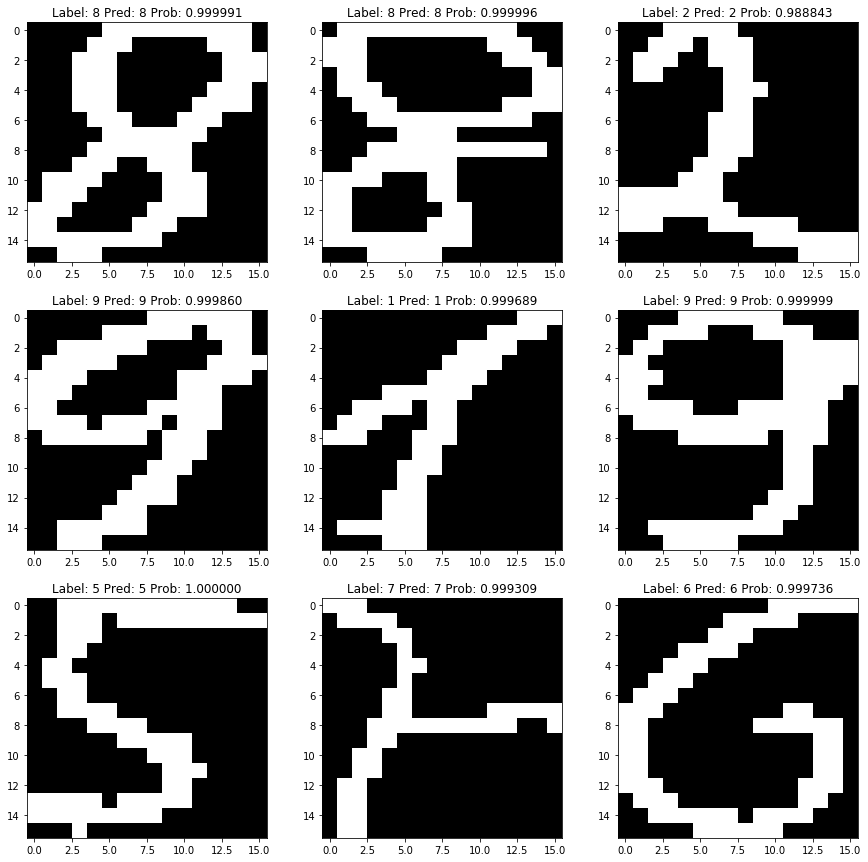

In [26]:
row = 3
col = 3

fig, axes = plt.subplots(row,col,figsize=(15,15))

for i in range(0,row):
    for j in range(0,col):
        x = random.randint(0,len(X_test))
        axes[i, j].imshow(X_test[x].reshape(16,16),cmap="gray")
        axes[i, j].set_title('Label: %d Pred: %d Prob: %f'
        %(y_value[np.argmax(y_test[x])],y_value[np.argmax(y_pred[x])],y_pred[x][np.argmax(y_pred[x])]))
        
plt.show()        

## Graphs of Model Accuracy and Model Loss (From each epoch)

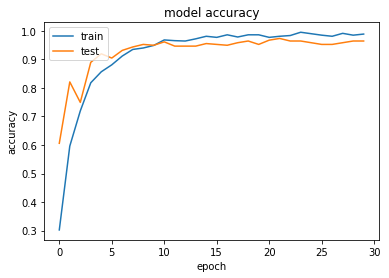

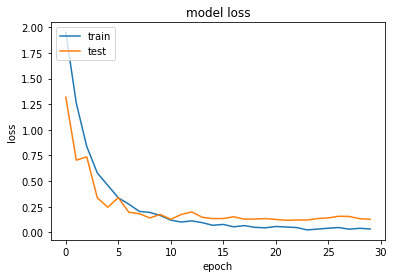

In [27]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### The model is not getting significant improvement after around 10 epochs. We can try to tune the parameters to improve the accuacy of the model but I am not going to demonstrate it in this notebook. Anyway, there you go, a simple handwritten digit classification model using CNN.